# 1. Đọc dữ liệu (1 điểm)

In [1]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv('black_friday.csv')

# Hiển thị 5 dòng đầu tiên
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# 2. Thông tin dữ liệu (1 điểm)

In [2]:
# Kiểm tra số dòng và số cột
print(df.shape)

# Kiểm tra số lượng giá trị bị thiếu trong từng cột
print(df.isna().sum())

(550068, 12)
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


Nhận xét:
- Tập dữ liệu có 550068, có 12 cột
- Những dữ liệu thiếu tập trung ở 2 cột Product_Category_2, Product_Category_3

# 3. Phân loại thuộc tính (1 điểm)


In [3]:
# Code
# df.columns
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

- Các thuộc tính định tính (Categorical): User_ID, Product_ID, Gender, City_Category, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Occupation

- Các thuộc tính định lượng (Numerical): Stay_In_Current_City_Years, Purchase

# 4. Sản phẩm phổ biến (1 điểm)

In [4]:
# Số lượng loại sản phẩm khác nhau
print(len(df['Product_ID'].unique()))

# Sản phẩm được mua nhiều nhất
df['Product_ID'].value_counts()


3631


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00066342       1
P00206942       1
P00107842       1
P00329842       1
P00051742       1
Name: Product_ID, Length: 3631, dtype: int64

Nhận xét:

- Số lượng loại sản phẩm là: 3631
- Sản phẩm được mua nhiều nhất là: P00265242


# 5. Tỷ lệ nam và nữ (1 điểm)

Male: 0.7531050706458111
Female: 0.24689492935418894


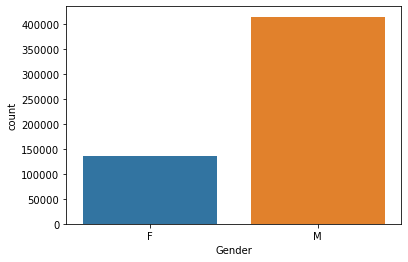

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm số lượng nam và nữ
male, female = df['Gender'].value_counts(normalize=True)
print(f'Male: {male}')
print(f'Female: {female}')

# Trực quan hóa (biểu đồ pie)
sns.countplot(x='Gender', data=df)
plt.show()

# 6. Nhóm tuổi có mức chi tiêu trung bình cao nhất (1 điểm)

In [6]:
import numpy as np

# Tính mức chi tiêu trung bình theo nhóm tuổi
res = df[['Age', 'Purchase']].groupby('Age').agg({'Purchase': np.average}).sort_values(by='Purchase')
print(res)

# Hiển thị nhóm tuổi có mức chi tiêu cao nhất
print(f'Nhóm tuổi có mức chi tiêu cao nhất {res["Purchase"].idxmax()}')


          Purchase
Age               
0-17   8933.464640
18-25  9169.663606
46-50  9208.625697
26-35  9252.690633
36-45  9331.350695
55+    9336.280459
51-55  9534.808031
Nhóm tuổi có mức chi tiêu cao nhất 51-55


# 7. Thống kê mức chi tiêu

In [7]:
# Tính các đại lượng thống kê
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Nhận xét:
- Purchase có: mean=9263.968713, median=8047.000000, std=5023.065394

# 8. Trực quan hóa phân bố chi tiêu

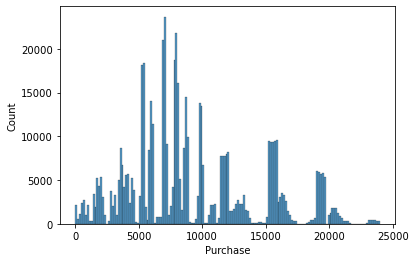

5023.065393820627


In [8]:
# Vẽ đồ thị Histogram hoặc Line hoặc hỗn hợp.
sns.histplot(data=df, x='Purchase')
plt.show()

print(df['Purchase'].std())

Nhận xét:
- Đồ thị có xu hướng lệch trái, phân phối không đều, có nhiều mức chi tiêu khác nhau
- Độ lệch chuẩn cao: 5023.065393820627 => khoảng cách chi tiêu lớn

# 9. Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính (1 điểm)






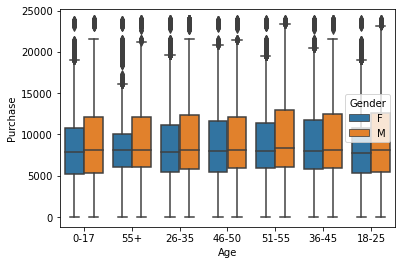

In [9]:
# Biểu đồ hộp (box-plot)
sns.boxplot(data=df, x='Age', y='Purchase', hue='Gender')
plt.show()


Nhận xét:
- Tất cả boxplot đều có dữ liệu ngoại lai, các nhóm tuổi và giới tính có mức chi tiêu khá đồng đều, không có sự khác biệt nhiều giữa các nhóm tuổi và giới tính.

# 10. Biểu đồ tròn thể hiện tỷ lệ tổng chi tiêu của từng nhóm tuổi

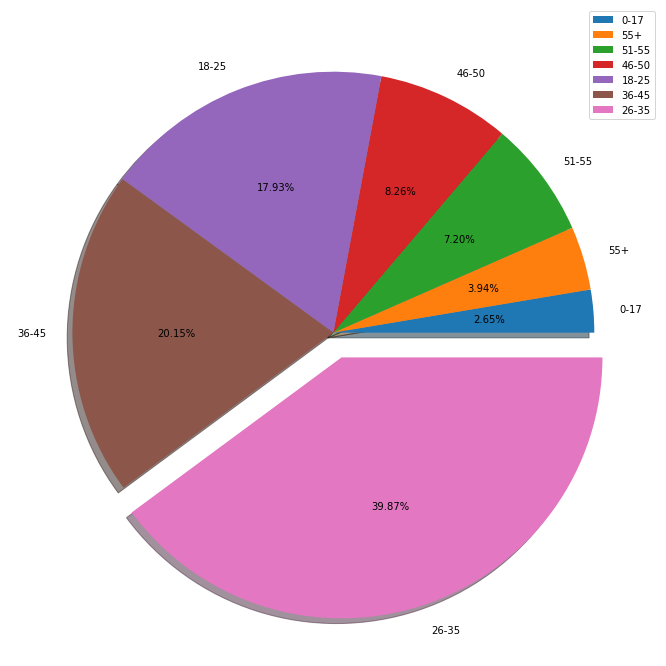

In [24]:
# Biểu đồ tròn

res = df[['Age', 'Purchase']].groupby('Age').agg({'Purchase': np.sum}).sort_values(by='Purchase')
ages = res.index  # Lấy cột Age
purchases = res['Purchase'] 

plt.figure(figsize=(12, 12))
plt.pie(purchases, labels=ages, autopct='%.2f%%', shadow=True, explode=[0, 0, 0, 0, 0, 0, 0.1])
plt.legend()
plt.show()